In [150]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.mixture import GaussianMixture

1

In [151]:
## Loading fetch_olivetti_faces
images, target = fetch_olivetti_faces(return_X_y=True)

## preserving 99% of the variance to reduce the dataset’s dimensionality using PCA
pca = PCA(0.99)
red_images = pca.fit_transform(images)

2

In [152]:
## Determine the most suitable covariance_type for the dataset
min_bic = np.infty

for k in range(1, 41):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(red_images).bic(red_images)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

print("The best covariance type is " + '\033[1m' + best_covariance_type + '\033[0m')

The best covariance type is diag


3

In [155]:
## Determine the minimum number of clusters that best represent the dataset using either BIC

print("The best number of k is " + '\033[1m' + str(best_k) + '\033[0m')

The best number of k is 2


4

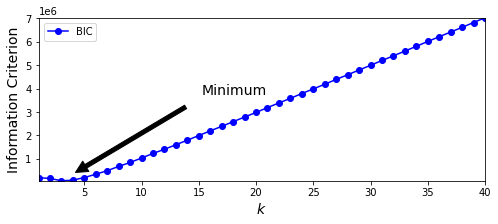

In [154]:
## Plot the results
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(red_images)
             for k in range(1, 41)]

## Using BIC
bics = [model.bic(red_images) for model in gms_per_k]

## Plotting BIC for different numbers of clusters k
plt.figure(figsize=(8, 3))
plt.plot(range(1, 41), bics, "bo-", label="BIC")
# plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 40, np.min(bics) - 50, np.max(bics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
# save_fig("bic_vs_k_plot")
plt.show()


5

In [156]:
## Output the hard clustering for each instance
gm = GaussianMixture(n_components=best_k, n_init=10,
                              covariance_type=best_covariance_type,
                              random_state=42).fit(red_images)
print(gm.predict(red_images))

[0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0
 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


6

In [159]:
## Output the soft clustering for each instance
print(gm.predict_proba(red_images))

[[9.99991277e-01 8.72282644e-06]
 [3.54765980e-10 1.00000000e+00]
 [1.01740205e-05 9.99989826e-01]
 [9.99995592e-01 4.40812958e-06]
 [9.92663910e-16 1.00000000e+00]
 [1.01198115e-14 1.00000000e+00]
 [8.20904982e-05 9.99917910e-01]
 [9.99289779e-01 7.10221406e-04]
 [6.13006859e-12 1.00000000e+00]
 [1.07922750e-26 1.00000000e+00]
 [1.92598999e-19 1.00000000e+00]
 [1.28518589e-17 1.00000000e+00]
 [2.66860908e-24 1.00000000e+00]
 [3.30452935e-21 1.00000000e+00]
 [5.62155665e-24 1.00000000e+00]
 [2.28319985e-01 7.71680015e-01]
 [9.04985866e-21 1.00000000e+00]
 [6.15033469e-04 9.99384967e-01]
 [1.28835504e-07 9.99999871e-01]
 [3.77523510e-07 9.99999622e-01]
 [9.99999946e-01 5.40798649e-08]
 [9.99831824e-01 1.68175846e-04]
 [9.99999988e-01 1.21014380e-08]
 [1.00000000e+00 6.80629227e-11]
 [9.91544468e-01 8.45553249e-03]
 [7.82413917e-16 1.00000000e+00]
 [4.06869810e-09 9.99999996e-01]
 [7.20519789e-06 9.99992795e-01]
 [9.99999768e-01 2.31954547e-07]
 [9.99988064e-01 1.19363173e-05]
 [5.327876

7

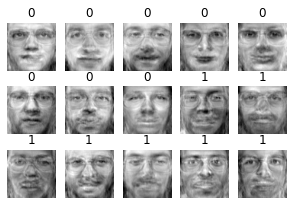

In [163]:
## Use the model to generate some new faces
new_faces, new_faces_target = gm.sample(15)

## Visualize new faces using the inverse_transform() method
## to transform the data back to its original space based on the PCA method

inv_images = pca.inverse_transform(new_faces)

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
    
plot_faces(inv_images, new_faces_target)

8

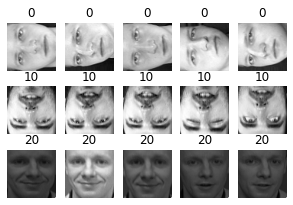

In [164]:
## Modifing some images 
rotated = np.transpose(images[:5].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = target[:5]

flipped = images[100:105].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = target[100:105]

darkened = images[200:205].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = target[200:205]

X_modified_faces = np.r_[rotated, flipped, darkened]
y_modified = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

9

In [168]:
## Determining if the model can detect the anomalies produced in (8)
## by comparing the output of the score_samples() method for normal images and for anomalies
X_modified_pca = pca.transform(X_modified_faces)

print("The output of the score_samples() method for normal image")
print(gm.score_samples(red_images[0:15]))
print()
print("The output of the score_samples() method for anomalies")
print(gm.score_samples(X_modified_pca))


The output of the score_samples() method for normal image
[ 22.07810884 -15.77573935 -16.29614178  27.36039091 -29.01467527
 -34.29951633  -5.67342877  22.15823337 -28.5921858  -35.92882861
 -31.85823783 -28.95946246 -39.29101933 -34.93526244 -38.50253529]

The output of the score_samples() method for anomalies
[-135.60482696 -121.12788553 -187.37269636 -188.5817896  -164.75896658
 -314.46680089 -335.67838274 -319.99036248 -242.6527778  -341.13223301
   62.19174437   67.52616929   64.60714801   69.72522804   72.19455502]
